# MODELO PREDICTIVO PARA SOLICITANTES DE TARJETAS DE CRÉDITO

## Importa el dataset

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive/cursos_crehana/eval_modelos/datos")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/cursos_crehana/eval_modelos/datos
/content/drive/My Drive/cursos_crehana/eval_modelos/datos


Información del dataset:

Este archivo se refiere a las solicitudes de tarjetas de crédito. Todos los nombres y valores de los atributos se han cambiado a símbolos para proteger la confidencialidad de los datos.

Este conjunto de datos es interesante porque hay una buena combinación de atributos: datos continuos, nominales con una pequeña cantidad de valores y nominales con una gran cantidad de valores. También hay algunos valores perdidos.

In [ ]:
import pandas as pd

cc_apps = pd.read_csv('credit-approval_csv.csv')
cc_apps.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
cc_apps.shape

(690, 16)

## Explora las variables del dataset

In [ ]:
# Print summary statistics
cc_apps_description = cc_apps.describe().T
print(cc_apps_description)

print('\n')

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspect missing values in the dataset
cc_apps.tail()

     count         mean          std    min      25%     50%       75%  \
A2   678.0    31.568171    11.957862  13.75  22.6025   28.46   38.2300   
A3   690.0     4.758725     4.978163   0.00   1.0000    2.75    7.2075   
A8   690.0     2.223406     3.346513   0.00   0.1650    1.00    2.6250   
A11  690.0     2.400000     4.862940   0.00   0.0000    0.00    3.0000   
A14  677.0   184.014771   173.806768   0.00  75.0000  160.00  276.0000   
A15  690.0  1017.385507  5210.102598   0.00   0.0000    5.00  395.5000   

           max  
A2       80.25  
A3       28.00  
A8       28.50  
A11      67.00  
A14    2000.00  
A15  100000.00  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    obje

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [ ]:
# Distribution of the target
cc_apps['class'].value_counts()

-    383
+    307
Name: class, dtype: int64

## Partición del dataset en entrenamiento (train) y prueba (test)

In [ ]:
# # Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13
cc_apps = cc_apps.drop(['A12', 'A14'], axis=1)

In [ ]:
# Split into train and test sets
cc_apps_train, cc_apps_test = train_test_split(cc_apps, test_size=0.33, random_state=42)

## Procesamiento de valores ausentes

In [ ]:
# Import numpy
import numpy as np

# Replace the '?'s with NaN in the train and test sets
cc_apps_train = cc_apps_train.replace('?', np.NaN)
cc_apps_test = cc_apps_test.replace('?', np.NaN)

In [ ]:
# Impute the missing values with mean imputation
cc_apps_train.fillna(cc_apps_train.mean(), inplace=True)
cc_apps_test.fillna(cc_apps_train.mean(), inplace=True)

# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isnull().sum())

print('\n')

print(cc_apps_test.isnull().sum())

A1       8
A2       0
A3       0
A4       6
A5       6
A6       7
A7       7
A8       0
A9       0
A10      0
A11      0
A13      0
A15      0
class    0
dtype: int64


A1       4
A2       0
A3       0
A4       0
A5       0
A6       2
A7       2
A8       0
A9       0
A10      0
A11      0
A13      0
A15      0
class    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Iterate over each column of cc_apps_train
for col in cc_apps_train.columns:
    # Check if the column is of object type
    if cc_apps_train[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps_train = cc_apps_train.fillna(cc_apps_train[col].value_counts().index[0])
        cc_apps_test = cc_apps_test.fillna(cc_apps_train[col].value_counts().index[0])

#result = df.fillna(df.mode().iloc[0])
# Count the number of NaNs in the dataset and print the counts to verify
# Count the number of NaNs in the datasets and print the counts to verify
print(cc_apps_train.isnull().sum())

print('\n')

print(cc_apps_test.isnull().sum())

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A13      0
A15      0
class    0
dtype: int64


A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A13      0
A15      0
class    0
dtype: int64


## Procesamiento de datos (II)

In [ ]:
cc_apps_train

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A13,A15,class
382,a,24.33,2.500,y,p,i,bb,4.500,f,f,0,g,456,-
137,b,33.58,2.750,u,g,m,v,4.250,t,t,6,g,0,+
346,b,32.25,1.500,u,g,c,v,0.250,f,f,0,g,122,-
326,b,30.17,1.085,y,p,c,v,0.040,f,f,0,g,179,-
33,a,36.75,5.125,u,g,e,v,5.000,t,f,0,g,4000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,g,0,-
106,b,28.75,1.165,u,g,k,v,0.500,t,f,0,s,0,-
270,b,37.58,0.000,b,b,b,b,0.000,f,f,0,p,0,+
435,b,19.00,0.000,y,p,ff,ff,0.000,f,t,4,g,1,-


In [ ]:
cc_apps_train['A4'].unique()

array(['y', 'u', 'b', 'l'], dtype=object)

In [ ]:
# Convert the categorical features in the train and test sets independently
cc_apps_train = pd.get_dummies(cc_apps_train)
cc_apps_test = pd.get_dummies(cc_apps_test)

# Reindex the columns of the test set aligning with the train set
cc_apps_test = cc_apps_test.reindex(columns=cc_apps_train.columns, fill_value=0)

In [ ]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = cc_apps_train.iloc[:, :-1].values, cc_apps_train.iloc[:, [-1]].values
X_test, y_test = cc_apps_test.iloc[:, :-1].values, cc_apps_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [ ]:
rescaledX_train[:1]

array([[0.16793651, 0.0949307 , 0.225     , 0.        , 0.00456   ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ]])

## Entrenamiento del modelo

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Predicciones

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

In [ ]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1], dtype=uint8)

In [ ]:
y_predp = logreg.predict_proba(rescaledX_test)

## Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]
y_estim = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]
confusion_matrix(y_true, y_estim)

array([[11,  1],
       [ 2,  6]])

In [ ]:
# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

array([[103,   0],
       [  0, 125]])

## Accuracy

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true, y_estim).ravel()
acc = (tp + tn)/(tn + fp + fn + tp)
acc

0.85

In [ ]:
# Get the accuracy score of logreg model and print it
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
y_estim = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

tn, fp, fn, tp = confusion_matrix(y_true, y_estim).ravel()
acc = (tp + tn)/(tn + fp + fn + tp)
acc

0.9

## Precision y recall

In [ ]:
y_true = [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]
y_estim = [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]

tn, fp, fn, tp = confusion_matrix(y_true, y_estim).ravel()

pr = tp/(tp + fp)
pr

0.8571428571428571

In [ ]:
###Completar
from sklearn.metrics import precision_score
precision_score(y_test, y_pred) 

1.0

In [ ]:
rec = tp/(tp + fn)
rec

0.75

In [ ]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

## Specificity y F1 score

In [ ]:
specificity = tn / (tn+fp)
specificity

0.9166666666666666

In [ ]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, pos_label=0) 

1.0

In [ ]:
f1 = 2*pr*rec/(pr + rec)
f1  

0.7999999999999999

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

1.0

##  Curva ROC y AUC

In [ ]:
###Completar
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = logreg.predict_proba(rescaledX_test)[:,1]

In [ ]:
y_score1[:10]

array([0.9875347 , 0.03523245, 0.98768624, 0.98658013, 0.2571872 ,
       0.04600832, 0.98817345, 0.04264756, 0.98826624, 0.98779498])

In [ ]:
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

In [ ]:
print('roc_auc_score for the model: ', roc_auc_score(y_test, y_score1))

roc_auc_score for the model:  1.0


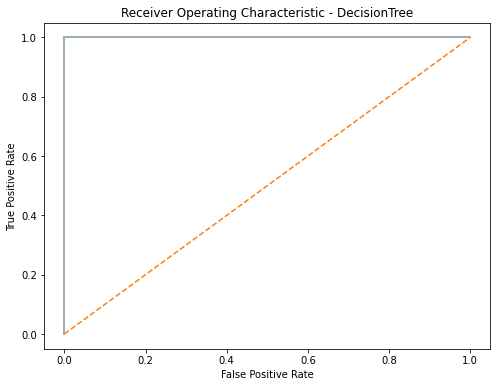

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#https://analyticsindiamag.com/complete-guide-to-understanding-precision-and-recall-curves/
#https://acutecaretesting.org/en/articles/precision-recall-curves-what-are-they-and-how-are-they-used

## Curva Precision - Recall

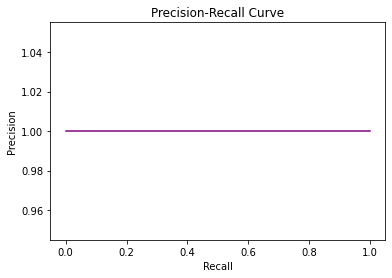

In [ ]:
#import precision_recall_curve function
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score1)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## K-fold Cross Validation

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, rescaledX_train, y_train, scoring='accuracy', cv=cv, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d ar

In [ ]:
print(scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
len(scores)

462

In [ ]:
len(rescaledX_train)

462

In [ ]:
from numpy import mean
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 1.000


In [ ]:
accuracy = cross_val_score(model, rescaledX_train, y_train, cv=10, verbose=1, scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d ar

In [ ]:
print(accuracy)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
